# Lab 2: Convolutional Neural Network (CNN)




In this laboratory we continue to work with Keras. We will focus on Convolutional Neural Network
we are going to work with cifar10, a  dataset consisting of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
Therefore the main goal of this laboratory is to solve a multiclass classification problem with 10 different classes

<br><img src= "https://drive.google.com/uc?export=view&id=1u-htQUPUm40h4HBBvg-JA5r0IfrRHqrq" width="500px" align="middle"><br>)

In [ ]:
# loading the dataset 

In [1]:
import numpy as np
import tensorflow as tf 
import os
new_im_size = 32
channels = 3

(train_X,train_Y),(test_X,test_Y) = tf.keras.datasets.cifar10.load_data()


# 2.1 Dataset pre-processing
The first thing that we need to do when we are dealing with a new dataset is to operate some pre-processing operations. Data preprocessing usually refers to the steps applied to make data more suitable for learning. 
In this section we are going to deal with:

* 2.1.1 Normalization
* 2.1.2 Standardization
* 2.1.3 Splitting and label preprocessing


## 2.1.1 Normalization
One common practice in training a Neural Network is to normalize the images by dividing each pixel value by the maximum value that we can have, i.e. 255.<br>
The purpose of this is to obtain a mean close to 0.<br>
Normalizing the data generally speeds up learning and leads to faster convergence

In [ ]:
# Normalizing the data
print("Normalizing training set..")
train_X = np.asarray(train_X, dtype=np.float32) / 255										# Normalizing training set
print("Normalizing test set..")
test_X = np.asarray(test_X, dtype=np.float32) / 255											# Normalizing test set

## 2.1.3 Standardization
Another common practice in data pre-processing is standardization.<br>
The idea about standardization is to compute your dataset mean and standard deviation in order to subtract from every data point $x$ the dataset mean $\mu$ and then divide by the standard deviation $\sigma$.<br>
That is to apply the following operation:<br>
<img src="https://drive.google.com/uc?id=1rpuybw_fmI8XK38JQhWWxX2TOExBAV2V" width="150px"><br>
The outcome of this operation is to obtain a distribution with mean equal to 0 and a standard deviation equal to 1.<br>
By applying normalization to our data we are making the features more similar to each other and this usually makes the learning process easier.<br>
To better understand that we can show an example of what happens after a standardization process is applied to a dataset:
<img src="https://drive.google.com/uc?id=1wtqTW4hz8n8k7b7q0mUSzCc9X0npNUY2" width="500px" align="left"><br>

In [ ]:
# Standardizing the data
def standardize_dataset(X):
	image_means = []
	image_stds = []

	for image in X:
		image_means.append(np.mean(image))											# Computing the image mean
		image_stds.append(np.std(image))											# Computing the image standard deviation

	dataset_mean = np.mean(image_means)												# Computing the dataset mean
	dataset_std = np.mean(image_stds)												# Computing the dataset standard deviation
	return [dataset_mean, dataset_std]					# For every image we subtract to it the dataset mean and we divide by the dataset standard deviation


In [ ]:
dataset_mean, dataset_std = standardize_dataset(train_X)
print("Standardizing training set..")
train_X = (train_X-dataset_mean)/dataset_std												# Standardizing the training set
print("Standardizing test set..")
test_X = (test_X-dataset_mean)/dataset_std												# Standardizing the test set

## 2.1.4 Splitting and label preprocessing
Now we just need to split our training set in orer to get the validation set and convert our labels to one-hot representation

In [2]:
# Creating the validation set
from sklearn.model_selection import train_test_split
print("Splitting training set to create validation set..")
train_X, valid_X, train_Y, valid_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=13)

# Converting labels to one-hot representation
from tensorflow.keras.utils import to_categorical
train_Y_one_hot = to_categorical(train_Y)						# Converting training labels to one-hot representation
valid_Y_one_hot = to_categorical(valid_Y)						# Converting validation labels to one-hot representation
test_Y_one_hot = to_categorical(test_Y)							# Converting test labels to one-hot representation

print(len(train_X))
print(len(train_Y_one_hot))

Splitting training set to create validation set..
40000
40000


# 2.2 Training a model from scratch
Now that we have properly pre-processed our data, we are going to create a convolutional model in Keras. 
Usually a convolutional model is made by two subsequent part:
* A convolutional part
* A fully connected

We can show an example of the general structure in the next picture:
<img src="https://drive.google.com/uc?id=1duP8u9bs6ELNu4degUuYP4-YS1mBYn2O" width="600px"><br>

Usually the convolutional part is made by some layers composed by
* convolutional layer: performs a spatial convolution over images
* pooling layer: used to reduce the output spatial dimension from $n$ to 1 by averaging the $n$ different value or considering the maximum between them 
* dropout layer: applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training.

The convolutional part produces its output and the fully connected part ties together the received information in order to solve the classification problem.
Let us start with a shallow architecture with only 2 conv

In [15]:
# Creating the model from scratch
import tensorflow.keras
from tensorflow.keras import Sequential,Input,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from sklearn.metrics import accuracy_score

# Network parameters
batch_size = 64													# Setting the batch size
epochs = 10														# Setting the number of epochs
num_classes = 10									# Getting the amount of classes
print(num_classes)
scratch_model = Sequential()	

# Build here your keras model.
# You can try to use one or more convolutional layer, joint with pooling layer and dropout layer

scratch_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
scratch_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# pooling layer 
scratch_model.add(MaxPooling2D((2, 2)))

#flatten the features for fully-connected layers of our network 
scratch_model.add(Flatten())

# Adding the dense final part
scratch_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
scratch_model.add(Dense(10, activation='softmax'))


# Compile the model with the Adam optimizer
scratch_model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])

# Visualize the model through the summary function
scratch_model.summary()

10
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 1,060,138
Trainable params: 1,060,138
Non-trainable params: 0
_________________________________________

In [16]:
# Let's train the model!
scratch_model_history = scratch_model.fit(train_X, train_Y_one_hot, batch_size=batch_size, shuffle=True, epochs=epochs, validation_data=(valid_X, valid_Y_one_hot))

Epoch 1/10
625/625 [==============================] - 4s 6ms/step - loss: 27.2777 - accuracy: 0.2670 - val_loss: 1.7774 - val_accuracy: 0.3639
Epoch 2/10
625/625 [==============================] - 4s 6ms/step - loss: 1.6962 - accuracy: 0.3973 - val_loss: 1.7524 - val_accuracy: 0.3948
Epoch 3/10
625/625 [==============================] - 4s 6ms/step - loss: 1.5062 - accuracy: 0.4629 - val_loss: 1.6318 - val_accuracy: 0.4351
Epoch 4/10
625/625 [==============================] - 4s 6ms/step - loss: 1.3437 - accuracy: 0.5235 - val_loss: 1.5969 - val_accuracy: 0.4560
Epoch 5/10
625/625 [==============================] - 4s 6ms/step - loss: 1.1923 - accuracy: 0.5780 - val_loss: 1.6707 - val_accuracy: 0.4619
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 1.0580 - accuracy: 0.6245 - val_loss: 1.6992 - val_accuracy: 0.4694
Epoch 7/10
625/625 [==============================] - 4s 6ms/step - loss: 0.9431 - accuracy: 0.6708 - val_loss: 1.8897 - val_accuracy: 0.4707
Epoch

In [17]:
# Getting the results
scratch_model_train_acc = scratch_model_history.history['accuracy']
scratch_model_valid_acc = scratch_model_history.history['val_accuracy']
scratch_model_train_loss = scratch_model_history.history['loss']
scratch_model_valid_loss = scratch_model_history.history['val_loss']

print("Test accuracy: ", accuracy_score(scratch_model.predict_classes(test_X), test_Y))			# Testing the model

Test accuracy:  0.4656


**Is the obtained value coherent with what you expected?**<br>
**What are the differences when using a different batch size? Why?**

**Try to make the network deeper, adding more Conv and Pooling layers. Do the performances improve? 

In [7]:
deeper_model = Sequential()

deeper_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
deeper_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
deeper_model.add(MaxPooling2D((2, 2)))



#add convolutional layers here 



# add fully connected layers for classification 

# compile model
deeper_model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])

deeper_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 128)        

In [8]:
deeper_model_history = deeper_model.fit(train_X, train_Y_one_hot, batch_size=batch_size, shuffle=True, epochs=epochs, validation_data=(valid_X, valid_Y_one_hot))

Epoch 1/10
625/625 [==============================] - 6s 10ms/step - loss: 7.1947 - accuracy: 0.3625 - val_loss: 1.5627 - val_accuracy: 0.4353
Epoch 2/10
625/625 [==============================] - 6s 10ms/step - loss: 1.3952 - accuracy: 0.4982 - val_loss: 1.3241 - val_accuracy: 0.5364
Epoch 3/10
625/625 [==============================] - 6s 10ms/step - loss: 1.2355 - accuracy: 0.5596 - val_loss: 1.1878 - val_accuracy: 0.5833
Epoch 4/10
625/625 [==============================] - 6s 10ms/step - loss: 1.1156 - accuracy: 0.6042 - val_loss: 1.1650 - val_accuracy: 0.5845
Epoch 5/10
625/625 [==============================] - 6s 10ms/step - loss: 1.0248 - accuracy: 0.6375 - val_loss: 1.1218 - val_accuracy: 0.6104
Epoch 6/10
625/625 [==============================] - 6s 10ms/step - loss: 0.9421 - accuracy: 0.6701 - val_loss: 1.1036 - val_accuracy: 0.6229
Epoch 7/10
625/625 [==============================] - 6s 10ms/step - loss: 0.8820 - accuracy: 0.6903 - val_loss: 1.0776 - val_accuracy: 0.6340

In [10]:
# Getting the results
deeper_model_train_acc = deeper_model_history.history['accuracy']
deeper_model_valid_acc = deeper_model_history.history['val_accuracy']
deeper_model_train_loss = deeper_model_history.history['loss']
deeper_model_valid_loss = deeper_model_history.history['val_loss']
print("Test accuracy: ", accuracy_score(deeper_model.predict_classes(test_X), test_Y))			# Testing the model

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Test accuracy:  0.6697


# 2.3 Data Augmentation
Before even starting to load the dataset we should ask ourself whether the available amount of data is sufficient to our purposes.<br>
When the answer is negative we could need to do "data augmentation".<br>
Doing data augmentation means to increase the number of available data points. In terms of images, it may mean that increasing the number of images in the dataset. A common way to do this is to generate new images by applying a linear transformation to the original images in the dataset.<br>
The most common linear transformations are the following:<br>
* Rotation
* Shifting
* Blurring
* Change lighting conditions

In the picture below we show an example of augmentation:<br>
<img src="https://drive.google.com/uc?id=1B74snda_oJKkhVzxch9Ov8Y1XL63U3w5" width="600px" align="left"><br>

In [ ]:
# Data augmentation
# The augm_factor determine the copy amount created from every single image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen_train = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,rotation_range=45, horizontal_flip=True)
(train_X,train_Y),(test_X,test_Y) = tf.keras.datasets.cifar10.load_data()
# Normalizing the data
print("Normalizing training set..")
train_X = np.asarray(train_X, dtype=np.float32) / 255										# Normalizing training set
print("Normalizing test set..")
test_X = np.asarray(test_X, dtype=np.float32) / 255											# Normalizing test set
batch_size = 64													# Setting the batch size
epochs = 5														# Setting the number of epochs
num_classes = 10
# Creating the validation set
from sklearn.model_selection import train_test_split
print("Splitting training set to create validation set..")
train_X, valid_X, train_Y, valid_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=13)

# Converting labels to one-hot representation
from tensorflow.keras.utils import to_categorical
train_Y_one_hot = to_categorical(train_Y)						# Converting training labels to one-hot representation
valid_Y_one_hot = to_categorical(valid_Y)						# Converting validation labels to one-hot representation
test_Y_one_hot = to_categorical(test_Y)							# Converting test labels to one-hot representation
print(len(train_X))
print(len(train_Y_one_hot))
train = datagen_train.flow(train_X,train_Y_one_hot, batch_size=batch_size)



Now try to build a new model dealing with the augmented dataset.

In [ ]:
deeper_model.fit_generator(train,steps_per_epoch = int(train_X.shape[0]/batch_size),shuffle=True, epochs=epochs, validation_data=(valid_X, valid_Y_one_hot))

In [14]:
# Getting the results
deeper_model_train_acc = deeper_model_history.history['accuracy']
deeper_model_valid_acc = deeper_model_history.history['val_accuracy']
deeper_model_train_loss = deeper_model_history.history['loss']
deeper_model_valid_loss = deeper_model_history.history['val_loss']
print("Test accuracy: ", accuracy_score(deeper_model.predict_classes(test_X), test_Y))	

Test accuracy:  0.6697


**What is the performance obtained on this new augmented dataset?**<br>
**How can you explain the obtained result?**

# 2.4 Using a pre-trained model
A common alternative to train a model from scratch consists in using a pre-trained model.<br>
The idea is to replace the convolutional part with a highly optimized convolutional part engineered and trained previously by someone else.<br>
Usually the models that we can use through keras.applications have been trained over the image net dataset. <br>
Today we are going to use the Xception Net model. Its architecture it is shown below:
<img src="https://drive.google.com/uc?id=1eKivBCSKnWKyBxmGe5s64oOyhzhuCaqU" width="600px"><br>
After the convolutional part replacement we still need to set up a fully connected part.<br>
**Why in this lab we cannot use the fully connected part of Xception Net?<br>
What should we do to use it?<br>
And more in general in which situations we can do that?**

Moreover, using a pre-trained network is not always the best choice<br>
**Can you guess in which situations could be useful to use a pre-trained model?**

In [ ]:
# Creating the model based over the pretrained Xception network
from tensorflow.keras import applications
import tensorflow
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
model = models.Sequential()

model.add(tensorflow.keras.layers.UpSampling2D(size=(7,7),input_shape=(32,32,3)))

Xception_model = applications.Xception(weights = "imagenet", include_top=False, input_shape = (224, 224, channels))

for layer in Xception_model.layers:
    layer.trainable = False
    
Inputs = layers.Input(shape=(32,32,3))
x = model(Inputs)
x = Xception_model(x)
x = layers.Flatten()(x)
# let's add a fully-connected layer
x = layers.Dense(128, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = layers.Dense(10, activation='softmax')(x)

# this is the model we will train
pre_trained_model = tensorflow.keras.Model(Inputs, outputs=predictions)
pre_trained_model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
# Visualize the model through the summary function
pre_trained_model.summary()

In [ ]:
# Let's train the model!
pretrained_model_history = pre_trained_model.fit(train_X, train_Y_one_hot, epochs=epochs, batch_size=batch_size, validation_data=(valid_X, valid_Y_one_hot))

In [ ]:
# Getting the results
pretrained_model_train_acc = pretrained_model_history.history['acc']
pretrained_model_valid_acc = pretrained_model_history.history['val_acc']
pretrained_model_train_loss = pretrained_model_history.history['loss']
pretrained_model_valid_loss = pretrained_model_history.history['val_loss']

test_X_feature = pre_trained_model.predict(test_X)						# Producing the test feature
print("Test accuracy: ", accuracy_score(pretrained_model.predict_classes(test_X_feature), test_Y)) # Testing the model

# 2.5 Comparing the models

Now that we trained both the "from scratch" and the "pre-trained" models, we are going to compare the obtained results obtained during the training. We are going to consider accuracy and loss.<br>
**What can you expect from these plots?**

Producing accuracy over epochs plot
Producing loss over epochs plot


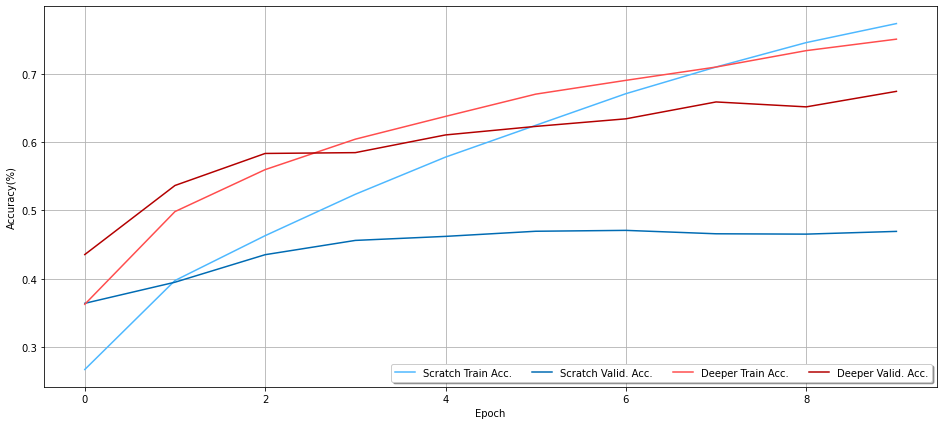

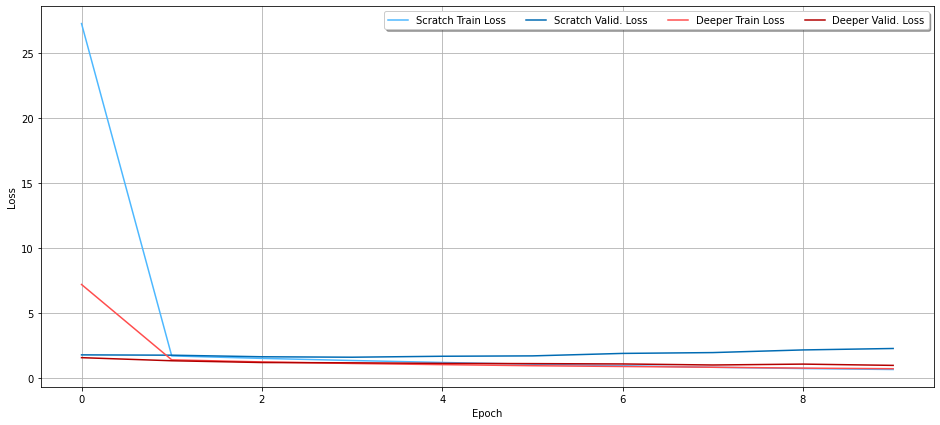

In [19]:
# Create here the plots to compare the "from scratch" model and the "pretrained" model
# Try to produce a comparison plot about the accuracies (train and validation) and another plot for the losses
# Creating the plots to compare the "from scratch" model and the "pretrained" model
# Producing accuracy over epochs plot
print("Producing accuracy over epochs plot")
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,7))

plt.plot(scratch_model_train_acc, label="Scratch Train Acc.", color="#4db8ff")
plt.plot(scratch_model_valid_acc, label="Scratch Valid. Acc.", color="#006bb3")

plt.plot(deeper_model_train_acc, label="Deeper Train Acc.", color="#ff4d4d")
plt.plot(deeper_model_valid_acc, label="Deeper Valid. Acc.", color="#b30000")

plt.xlabel('Epoch')
plt.ylabel('Accuracy(%)')
plt.legend(loc='lower right', fancybox=True, shadow=True, ncol=4)
plt.grid()
plt.savefig('acc_epochs.png', dpi=300)


# Producing loss over epochs plot
print("Producing loss over epochs plot")
fig = plt.figure(figsize=(16,7))

plt.plot(scratch_model_train_loss, label="Scratch Train Loss", color="#4db8ff")
plt.plot(scratch_model_valid_loss, label="Scratch Valid. Loss", color="#006bb3")

plt.plot(deeper_model_train_loss, label="Deeper Train Loss", color="#ff4d4d")
plt.plot(deeper_model_valid_loss, label="Deeper Valid. Loss", color="#b30000")

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right', fancybox=True, shadow=True, ncol=4)
plt.grid()
plt.savefig('loss_epochs.png', dpi=300)

plt.show()






**What information can you get from these plots?**<br>
**Try to visualize the differences between the deeper model and the pre-trained xception model!
**Are they showing what you expected?**